In [290]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [291]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [292]:
X = np.array(df.loc[:,df.columns != 'output'])
Y = np.array(df['output'])

print(f'X: {X.shape} Y:{Y.shape}')


X: (303, 13) Y:(303,)


In [293]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=123)

In [294]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [295]:
X_test_scale

array([[-7.17637765e-01, -1.52153491e+00,  9.58942449e-01,
        -7.27189932e-02,  4.92344236e-01, -4.18039809e-01,
         8.92534945e-01, -4.97604972e-01, -6.63683803e-01,
        -7.07613840e-01,  9.26724929e-01, -7.26717892e-01,
        -5.26408702e-01],
       [ 3.85718900e-01, -1.52153491e+00, -9.66900478e-01,
         2.33796544e+00, -4.24596699e-01,  2.39211668e+00,
        -1.01891157e+00, -1.93622706e-01,  1.50674161e+00,
         1.69773801e+00, -7.34515314e-01,  1.29472728e+00,
        -2.20260483e+00],
       [ 1.65047567e-01,  6.57231057e-01, -9.66900478e-01,
        -7.27189932e-02,  6.39054785e-01,  2.39211668e+00,
        -1.01891157e+00, -2.06094234e+00,  1.50674161e+00,
         5.87575619e-01, -2.39575556e+00, -7.26717892e-01,
         1.14978743e+00],
       [-5.56237658e-02,  6.57231057e-01, -9.66900478e-01,
        -5.54855879e-01,  6.94071241e-01, -4.18039809e-01,
        -1.01891157e+00, -1.49640384e+00,  1.50674161e+00,
         2.06779214e+00, -7.34515314e

In [296]:
import numpy as np

class NeuralNetworkFromScratch:
    def __init__(self, LR, X_train, Y_train, X_test, Y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.L_train = []
        self.L_test = []

    def activation(self, x):
        # Sigmoid
        return 1 / (1 + np.exp(-x))

    def dactivation(self, x):
        # Derivative of sigmoid
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, x):
        hidden_1 = np.dot(x, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1

    def backward(self, x, y_true):
        hidden_1 = np.dot(x, self.w) + self.b
        y_pred = self.forward(x)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = x

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw

        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        self.b -= self.LR * dL_db
        self.w -= self.LR * dL_dw

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            random_index = np.random.randint(len(self.X_train))
            y_train_true = self.Y_train[random_index]
            Y_train_pred = self.forward(self.X_train[random_index])

            L = np.sum(np.square(Y_train_pred - y_train_true))
            self.L_train.append(L)

            dL_db, dL_dw = self.backward(self.X_train[random_index], y_train_true)
            self.optimizer(dL_db, dL_dw)

            L_sum = 0
            for j in range(len(self.X_test)):
                Y_test_pred = self.forward(self.X_test[j])
                L_sum += np.sum(np.square(Y_test_pred - self.Y_test[j]))
            self.L_test.append(L_sum)

        return 'Training Done'


In [297]:
LR = 0.3
ITERATIONS = 3000
nn = NeuralNetworkFromScratch(LR,X_train_scale,Y_train,X_test_scale,Y_test)
nn.train(ITERATIONS)

'Training Done'

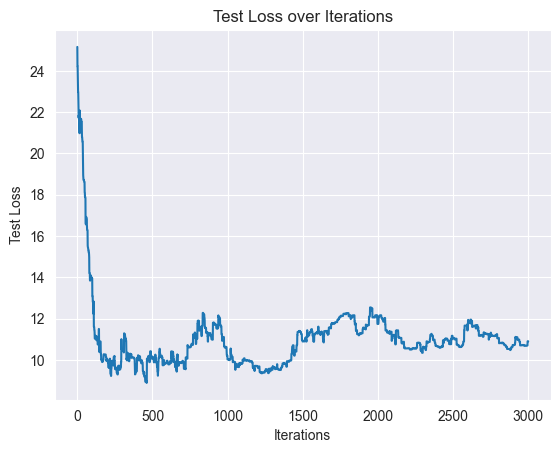

In [298]:
from matplotlib import pyplot as plt
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)
plt.xlabel("Iterations")
plt.ylabel("Test Loss")
plt.title("Test Loss over Iterations")
plt.show()


In [299]:
total = X_test_scale.shape[0]
correct = 0
for i in range(total):
    y_pred = np.round(nn.forward(X_test_scale[i]))
    if y_pred > 0.5:
        y_pred = 1
    else:
        y_pred = 0
    if y_pred == Y_test[i]:
        correct += 1
print(f'Accuracy: {correct/total}')

Accuracy: 0.7868852459016393


In [300]:
correct / total

0.7868852459016393

In [301]:
from collections import Counter
Counter(Y_test)

Counter({1: 31, 0: 30})

In [302]:
31 / 61

0.5081967213114754

In [303]:
confusion_matrix(Y_test, [np.round(nn.forward(x)) for x in X_test_scale])

array([[24,  6],
       [ 7, 24]], dtype=int64)

# Tensors

In [304]:
import torch



In [305]:
x = torch.tensor(5.5)
x

tensor(5.5000)

In [306]:
y = x + 10
y

tensor(15.5000)

In [307]:
x.requires_grad

False

In [308]:
x = torch.tensor(2.0,requires_grad=True)
x.requires_grad

True

<Axes: >

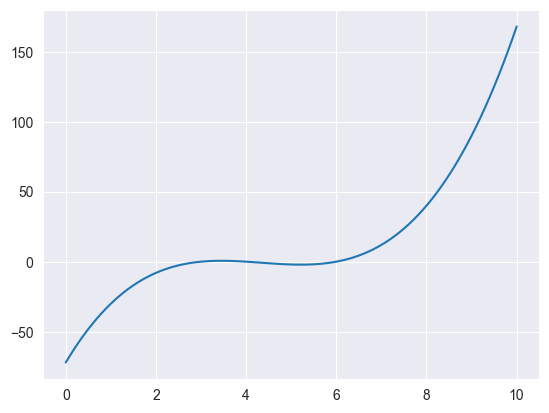

In [309]:
def y_func(x):
    return (x-3)*(x-6)*(x-4)
x_range = np.linspace(0,10,101)
y_range = [y_func(x) for x in x_range]
sns.lineplot(x=x_range,y = y_range)

In [310]:
y = (x-3)*(x-6)*(x-4)
y.backward()

In [311]:
x.grad

tensor(14.)

In [312]:
x = torch.tensor(1.0,requires_grad=True)
y = x**3
z = 5*x-4
z.backward()

In [313]:
x.grad

tensor(5.)

In [314]:
x11 = torch.tensor(2.0,requires_grad=True)
x21 = torch.tensor(3.0,requires_grad=True)
x12 = 5 * x11 + 3 * x21
x22 = 7 * x11**2 + 2 * x21
y = 4 * x12 + 3 * x22
y.backward()
x11.grad

tensor(104.)

# Into the Deep - Linear Regression

In [315]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


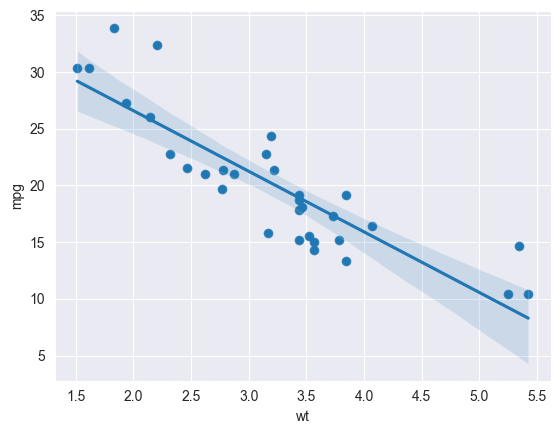

In [316]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(x = 'wt', y ='mpg', data=cars)
sns.regplot(x = 'wt', y ='mpg', data=cars)
plt.show()

In [317]:
X_list = cars.wt.values
x_np = np.array(X_list,dtype=float).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list,dtype=float).reshape(-1,1)
x = torch.from_numpy(x_np)


y = torch.tensor(y_list)
y_true = torch.from_numpy(y_np)
x = x.float()
y_true = y_true.float()

In [318]:
y_true

tensor([[21.0000],
        [21.0000],
        [22.8000],
        [21.4000],
        [18.7000],
        [18.1000],
        [14.3000],
        [24.4000],
        [22.8000],
        [19.2000],
        [17.8000],
        [16.4000],
        [17.3000],
        [15.2000],
        [10.4000],
        [10.4000],
        [14.7000],
        [32.4000],
        [30.4000],
        [33.9000],
        [21.5000],
        [15.5000],
        [15.2000],
        [13.3000],
        [19.2000],
        [27.3000],
        [26.0000],
        [30.4000],
        [15.8000],
        [19.7000],
        [15.0000],
        [21.4000]])

In [319]:
w = torch.rand(1,requires_grad=True,dtype=torch.float32)
b = torch.rand(1,requires_grad=True,dtype=torch.float32)

num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
 
 for i in range(len(x)):
     y_pred = x[i] * w + b
     
     loss = torch.pow(y_pred - y[i],2)
     
     loss.backward()
     
     loss_value = loss.data[0]
     
     with torch.no_grad():
         w -= learning_rate * w.grad
         b -= learning_rate * b.grad
         
         w.grad.zero_()
         b.grad.zero_()
         
    
 print(f'Epoch {epoch} Loss {loss_value}')
     
     

Epoch 0 Loss 142.18646240234375
Epoch 1 Loss 76.0289077758789
Epoch 2 Loss 52.587337493896484
Epoch 3 Loss 43.15705108642578
Epoch 4 Loss 38.96633529663086
Epoch 5 Loss 36.916481018066406
Epoch 6 Loss 35.786964416503906
Epoch 7 Loss 35.06458282470703
Epoch 8 Loss 34.52556610107422
Epoch 9 Loss 34.0709228515625
Epoch 10 Loss 33.65631103515625
Epoch 11 Loss 33.261966705322266
Epoch 12 Loss 32.878814697265625
Epoch 13 Loss 32.50300216674805
Epoch 14 Loss 32.13254928588867
Epoch 15 Loss 31.766706466674805
Epoch 16 Loss 31.404987335205078
Epoch 17 Loss 31.04720115661621
Epoch 18 Loss 30.693279266357422
Epoch 19 Loss 30.343122482299805
Epoch 20 Loss 29.99673843383789
Epoch 21 Loss 29.65398406982422
Epoch 22 Loss 29.31484031677246
Epoch 23 Loss 28.979310989379883
Epoch 24 Loss 28.64734649658203
Epoch 25 Loss 28.318899154663086
Epoch 26 Loss 27.993938446044922
Epoch 27 Loss 27.67243766784668
Epoch 28 Loss 27.354351043701172
Epoch 29 Loss 27.039630889892578
Epoch 30 Loss 26.728288650512695
Epoc

In [320]:
print(f'weight: {w} bias: {b}')

weight: tensor([-5.2299], requires_grad=True) bias: tensor([36.8073], requires_grad=True)


In [321]:
y_pred = (x * w + b).detach().numpy()

In [322]:
y_pred.reshape(-1).shape

(32,)

<Axes: xlabel='wt', ylabel='mpg'>

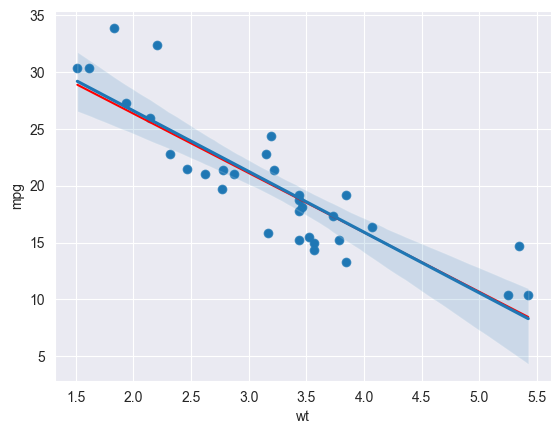

In [323]:
sns.scatterplot(x = X_list, y = y_list)
sns.lineplot(x = X_list, y = y_pred.reshape(-1) , color='red')
sns.regplot(x = 'wt', y ='mpg', data=cars)

<Axes: >

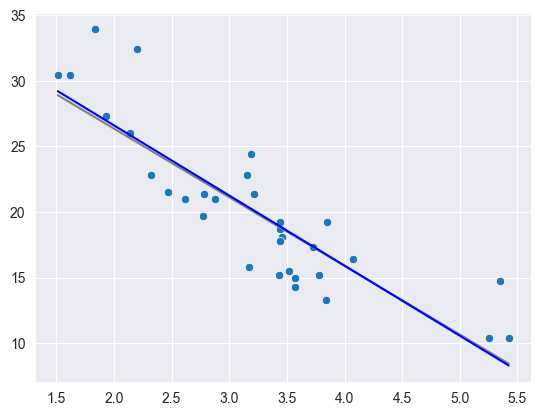

In [324]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_np,y_list)
y_pred_lr = lr.predict(x_np)
sns.scatterplot(x = X_list, y = y_list)
sns.lineplot(x = X_list, y = y_pred.reshape(-1) , color='gray')
sns.lineplot(x = X_list, y = y_pred_lr , color='blue')
#sns.regplot(x = 'wt', y ='mpg', data=cars)


In [325]:
print(f'weight: {lr.coef_} bias: {lr.intercept_}')

weight: [-5.34447157] bias: 37.28512616734204


In [326]:
import os
from torchviz import make_dot
import torch.nn as nn

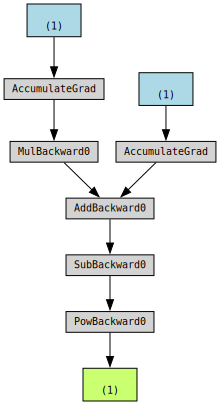

In [327]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
make_dot(loss)

In [328]:
class LinearRegressionTorch(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionTorch,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return out
    
input_dim = 1
output_dim = 1

model = LinearRegressionTorch(input_dim,output_dim)
    

In [329]:
loss_function = nn.MSELoss()
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=LR)


In [330]:

losses, Slope, Bias = [],[],[]

num_epochs = 1000

for i in range(num_epochs):
    optimizer.zero_grad()
    
    y_pred = model(x)
    
    loss = loss_function(y_pred,y_true)
    
    loss.backward()
    
    optimizer.step()
    
    for name, param in model.named_parameters():
        
        if param.requires_grad:
            if name == 'linear.weight':
                Slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                Bias.append(param.data.numpy()[0])
        
    losses.append(float(loss.data))
    
    if i % 100 == 0:
        print(f'Epoch {i} Loss {np.sqrt(loss.data)}')
        print()
    

Epoch 0 Loss 21.779308319091797

Epoch 100 Loss 8.28596305847168

Epoch 200 Loss 6.427253246307373

Epoch 300 Loss 5.141523361206055

Epoch 400 Loss 4.283118724822998

Epoch 500 Loss 3.7342822551727295

Epoch 600 Loss 3.398759126663208

Epoch 700 Loss 3.2015390396118164

Epoch 800 Loss 3.0889892578125

Epoch 900 Loss 3.0260162353515625


<Axes: >

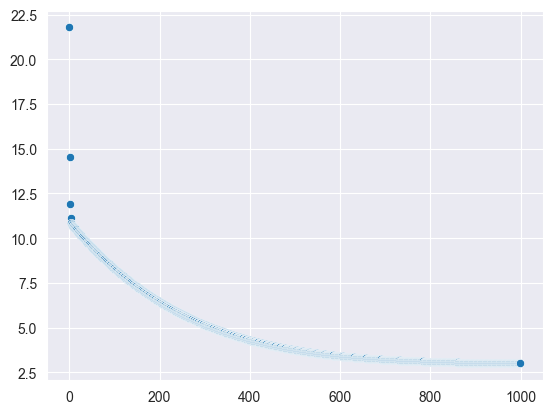

In [331]:
sns.scatterplot(x =range(num_epochs),y = np.sqrt(losses))

<Axes: >

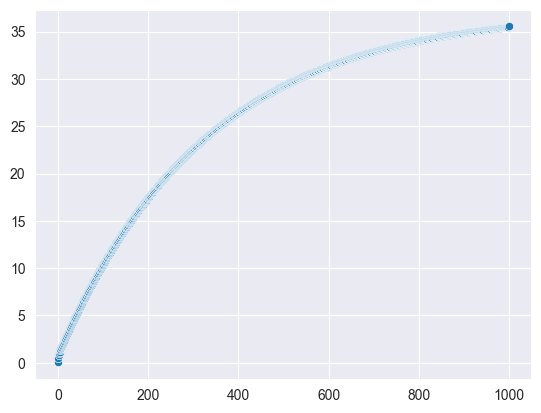

In [332]:
sns.scatterplot(x =range(num_epochs),y = Bias)

<Axes: >

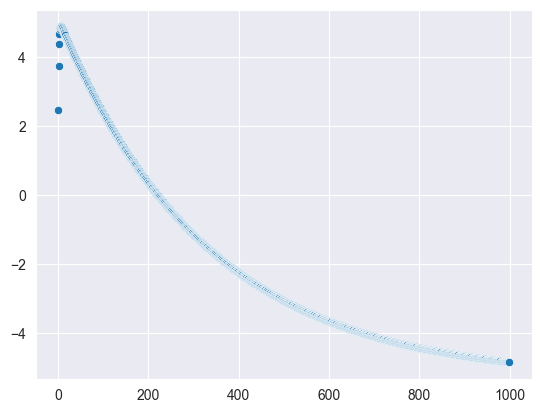

In [333]:
sns.scatterplot(x =range(num_epochs),y = Slope)

<Axes: xlabel='wt', ylabel='mpg'>

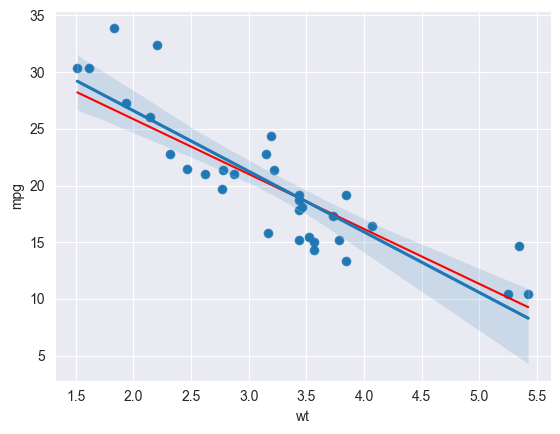

In [334]:
y_pred = model(x).detach().numpy()
sns.scatterplot(x = X_list, y = y_list)
sns.lineplot(x = X_list, y = y_pred.reshape(-1) , color='red')
sns.regplot(x = 'wt', y ='mpg', data=cars)  
